# 3 Exploratory Data Analysis <a class="anchor" id="3_Exploratory_Data_Analysis"></a>

## 3.1 Contents <a class="anchor" id="3_1Contents"></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
    * [3.1 Contents](#3_1Contents)
    * [3.2 Introduction](#3_2Introduction)        
    * [3.3 Imports](#3_3Imports)
    * [3.4 Load The Data](#3_4Load_The_Data) 
        * [3.4.1 Load features](#3_4_1Load_features)
    * [3.5 Explore The Data](#3_5Explore_The_Data) 
        * [3.5.1 Principal component analysis](#3_5_1Principal_component_analysis)
        * [3.5.2 Scatterplot EDA](#3_5_2Scatterplot_EDA)
    * [3.6 Summary](#3_6Summary) 

## 3.2 Introduction <a class="anchor" id="3_2Introduction"></a>

The data science problem is to predict the time to failure. EDA helps one to get familiar with the features of the dataset, investigate the relationships between features, and begin to understand the core characteristics of the data. Use different figures and methods to deepen this understanding. 

## 3.3 Imports <a class="anchor" id="3_3Imports"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
sns.set_context("talk")

pd.set_option("display.precision", 8)

## 3.4 Load The Data <a class="anchor" id="3_4Load_The_Data"></a>

### 3.4.1 Load features <a class="anchor" id="3_4_1Load_features"></a>

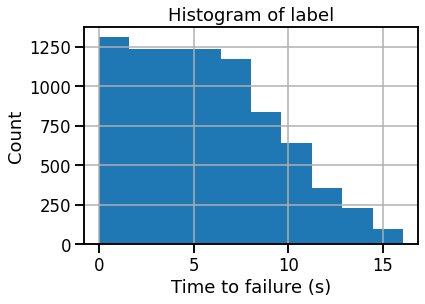

In [2]:
train_df = pd.read_pickle('../data/train_df243.pkl')
train_df['ttf'].hist()
plt.xlabel('Time to failure (s)')
plt.ylabel('Count')
plt.title('Histogram of label');

In [3]:
train_df.head().T

,0,1,2,3,4
ttf,1.43079722,1.41169584,1.39149892,1.37229753,1.35319614
mean,4.88411333,4.74680000,4.72576667,4.75300000,4.90639333
median,5.00000000,5.00000000,5.00000000,5.00000000,5.00000000
std,5.10110613,6.17338350,6.58882378,5.71503591,6.96739703
kurt,33.66248129,116.79737733,98.75851718,33.74477916,33.55521141
...,...,...,...,...,...
amp_spec_ac9,0.27540197,0.37761118,0.41643044,0.33546813,0.39950694
amp_spec_ac10,0.27093498,0.39778747,0.41198456,0.33400640,0.41143976
amp_spec_ac11,0.27565392,0.39368300,0.44162278,0.35154049,0.40667606
mean_centroids,3046.81558414,3061.90105937,3056.58770974,3059.96594183,2976.35196359


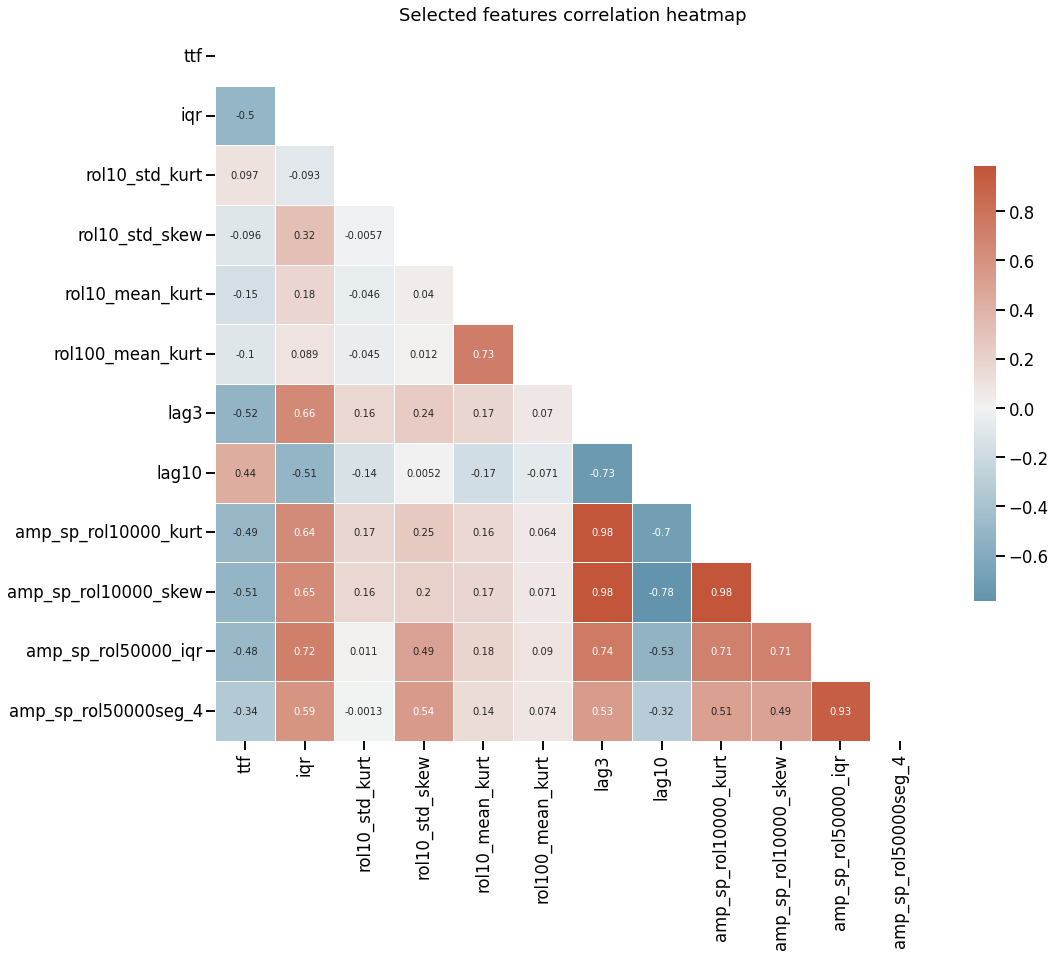

In [4]:
slected_features_df = train_df.loc[:,['ttf','iqr','rol10_std_kurt','rol10_std_skew','rol10_mean_kurt','rol100_mean_kurt',
                                      'lag3','lag10',
                                      'amp_sp_rol10000_kurt','amp_sp_rol10000_skew','amp_sp_rol50000_iqr','amp_sp_rol50000seg_4']]
corr_lag = slected_features_df.corr()
mask = np.triu(np.ones_like(corr_lag, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(16, 16))
ax = sns.heatmap(corr_lag, mask=mask, cmap=cmap,  center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
ax.set_title('Selected features correlation heatmap');

## 3.5 Explore The Data <a class="anchor" id="3_5Explore_The_Data"></a>

### 3.5.1 Principal component analysis <a class="anchor" id="3_5_1Principal_component_analysis"></a>

In [5]:
train_df.drop(columns = 'ttf', inplace = True)

In [6]:
train_scale_np = scale(train_df)
columns = train_df.columns
train_features_scale_df = pd.DataFrame(train_scale_np, columns=columns)
train_features_scale_df.head()

,mean,median,std,kurt,skew,min,max,qt5,qt25,qt75,...,amp_spec_ac4,amp_spec_ac5,amp_spec_ac6,amp_spec_ac7,amp_spec_ac8,amp_spec_ac9,amp_spec_ac10,amp_spec_ac11,mean_centroids,bandwidth
0,1.42420025,0.95401829,-0.17072933,-0.49054188,-0.31196590,0.19356782,-0.21823035,0.08271160,1.59829144,0.28728337,...,-0.44911539,-0.39852119,-0.50544117,-0.43865272,-0.48797896,-0.42914113,-0.45399737,-0.42343991,-0.70468486,-0.11220842
1,0.88805319,0.95401829,-0.04489642,0.68979934,0.83940930,-0.01748832,0.06352256,0.08271160,-0.39733360,0.28728337,...,0.34305633,0.22290499,0.29685227,0.35247227,0.29232950,0.19614639,0.32224912,0.30063608,-0.57829801,-0.17163216
2,0.80592744,0.95401829,0.00385595,0.43368534,0.55546330,-0.01748832,0.06352256,0.08271160,-0.39733360,0.28728337,...,0.52004497,0.40183233,0.44002401,0.53940972,0.45686816,0.43363186,0.40912520,0.59473347,-0.62281351,-0.29411833
3,0.91226141,0.95401829,-0.09868400,-0.48937343,-0.48687078,0.12949721,-0.19261645,0.08271160,-0.39733360,0.28728337,...,-0.06345179,-0.12593644,-0.04522097,-0.10175379,-0.08775925,-0.06167304,-0.06804540,0.04210333,-0.59451052,-0.23348428
4,1.51119367,0.95401829,0.04828193,-0.49206489,0.19317480,0.16341694,-0.08650172,-0.34120975,-0.39733360,0.28728337,...,0.37684332,0.36285404,0.39828316,0.37819631,0.38507272,0.33009860,0.40579140,0.38034496,-1.29503257,-0.79158222


In [7]:
train_features_scale_df.std(ddof = 0)

mean              1.0
median            1.0
std               1.0
kurt              1.0
skew              1.0
                 ... 
amp_spec_ac9      1.0
amp_spec_ac10     1.0
amp_spec_ac11     1.0
mean_centroids    1.0
bandwidth         1.0
Length: 243, dtype: float64

In [8]:
train_pca = PCA().fit(train_scale_np)

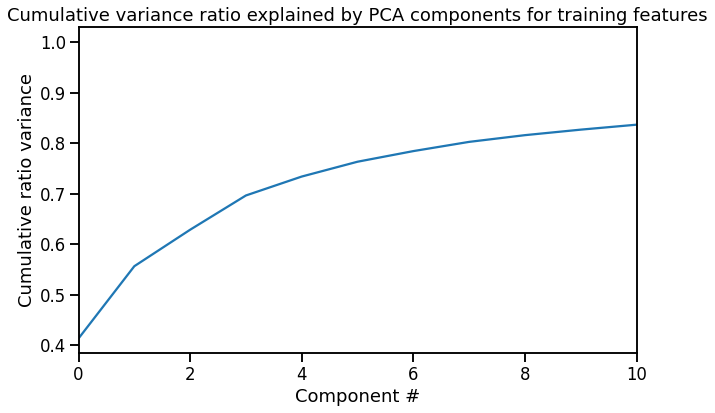

In [9]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `train_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(train_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.xlim((0,10))
plt.title('Cumulative variance ratio explained by PCA components for training features');

In [10]:
#Call `train_pca`'s `transform()` method, passing in `train_scale_np` as its argument
train_pca_x = train_pca.transform(train_scale_np)

In [11]:
train_pca_x.shape

(8355, 243)

In [12]:
pca_df = pd.DataFrame({'PC1': train_pca_x[:, 0], 'PC2': train_pca_x[:, 1],'PC3': train_pca_x[:,2]})
pca_df.head()

,PC1,PC2,PC3
0,-1.64167943,-0.02119847,5.05713557
1,2.10748008,-1.07010892,-2.80054567
2,3.38672231,-2.50592882,-1.58222385
3,0.74172674,-2.29753396,4.03671629
4,5.23029954,-3.70426946,5.91652686


In [13]:
pca_contribution = pd.DataFrame(train_pca.components_, columns=columns).sum().sort_values(ascending = False)
pos_features = pca_contribution.head(6).index.tolist()
neg_features = pca_contribution.tail(6).index.tolist()
print(pca_contribution)

rol10_kurt_min         3.16649437
rol100_kurt_qt25       2.71152084
iqr                    2.62297457
amp_sp_rol5000_qt25    2.50355261
rol10envelope_max      2.31165044
                          ...    
rol1000_skew_std      -1.79519988
rol10_std_median      -1.85278349
amp_sp_rol5000_kurt   -2.01728198
rol10_mean_min        -2.22039893
rol10_skew_median     -2.35296992
Length: 243, dtype: float64


### 3.5.2 Scatterplot EDA <a class="anchor" id="3_5_2Scatterplot_EDA"></a>

In [14]:
# define useful function to create scatterplots of time_to_failure against desired columns
def scatterplots(df, columns, ncol=None, figsize=(15, 20)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = df.columns[0],  data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel= df.columns[0])
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

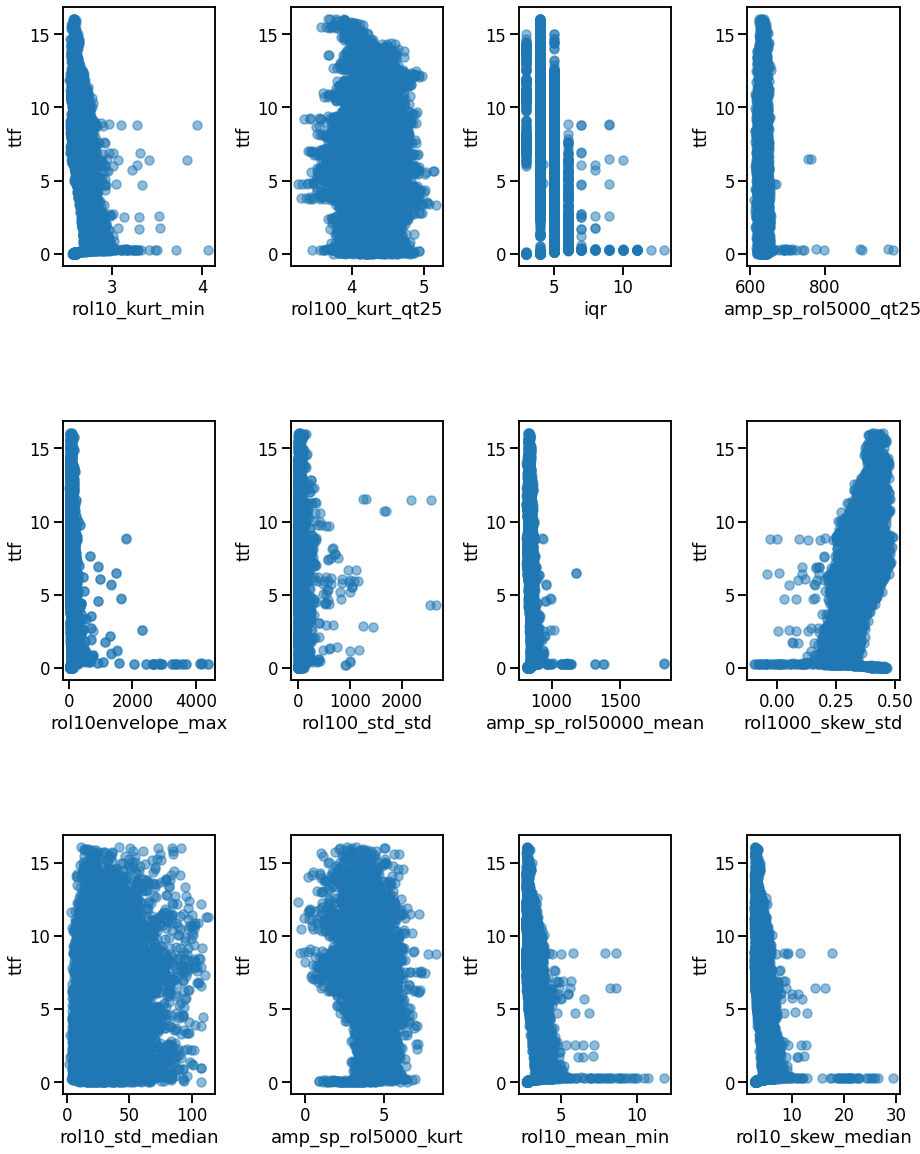

In [15]:
train_features_df = pd.read_pickle('../data/train_df243.pkl')
scatterplots(train_features_df, pos_features + neg_features, ncol=4)

## 3.6 Summary <a class="anchor" id="3_6Summary"></a>

* The correlation between a single feature and the label ranges from -0.6 to 0.6 
* Correlations become poor between some features and labels when the label is close to 0, even though air correlations are observed when labels are large
* The next task is to build a model to enhance the correlation.